# PIL

In [2]:
from PIL import Image
from PIL import ImageDraw, ImageStat
from pathlib import Path
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

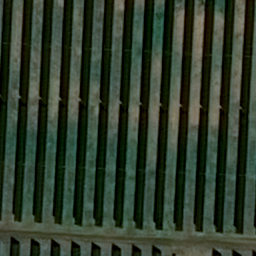

In [3]:
im = Image.open("assets/example.png")
im

This will show image in a separate window, title doesn't work, see [here](https://github.com/python-pillow/Pillow/issues/5739).

In [ ]:
im.show('pera')

This can show image in Jupyter with title but not true colors:

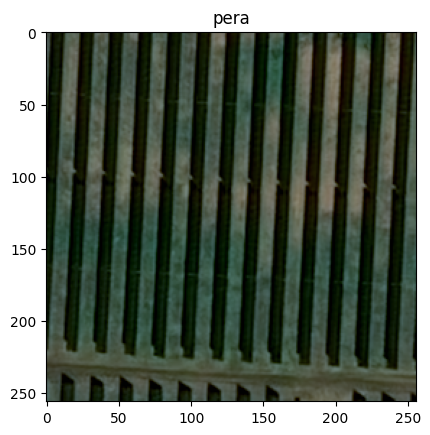

In [ ]:
plt.imshow(im)
plt.title('pera')
plt.show()

In jupyter one can use only:

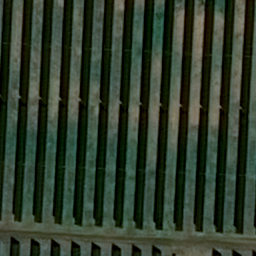

In [ ]:
im  # display(im)

To create new image:

In [ ]:
width, height = 256, 256
mask = Image.new('L', (width, height), 0)

Example to draw a polygon:

In [ ]:

polygon = [(4, 1), (1, 54), (1, 222), (13, 1)]
ImageDraw.Draw(mask).polygon(polygon, outline=255, fill=255)

To load image from png, show bands (i.e. channels):

In [ ]:
im = Image.open('assets/example.png')
print(im.getbands())

('R', 'G', 'B')


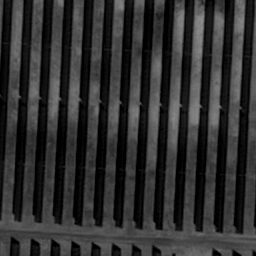

In [ ]:
im.getchannel('R')

To convert to RGB (from RGBA for example):

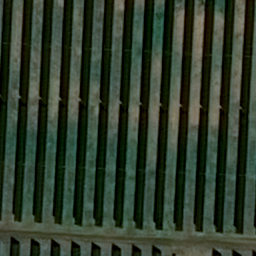

In [ ]:
im.convert('RGB')

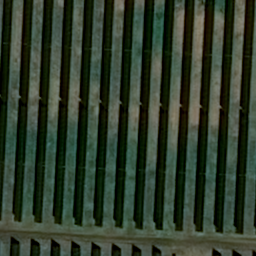

In [ ]:
im.convert("RGBA")

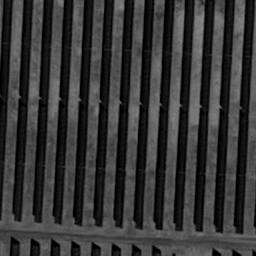

In [ ]:
im.convert('L')

To convert to tensor:

In [ ]:
tensorizer = ToTensor()
im_tensor = tensorizer(im)
print(im_tensor.shape)
im_tensor[:, :3, :3]

torch.Size([3, 256, 256])


tensor([[[0.3020, 0.2902, 0.2706],
         [0.2941, 0.2824, 0.2667],
         [0.2824, 0.2706, 0.2627]],

        [[0.3333, 0.3216, 0.3059],
         [0.3294, 0.3176, 0.3059],
         [0.3137, 0.3059, 0.3020]],

        [[0.3059, 0.2980, 0.2863],
         [0.2941, 0.2902, 0.2863],
         [0.2745, 0.2745, 0.2784]]])

In [ ]:
def save_image(im: Image, filepath: Path, overwrite: bool = False):
    if filepath.exists() and not overwrite:
        return
    im.save(filepath, "PNG")

# Stat

In [4]:
stat = ImageStat.Stat(im)
print("""
* Min/max values for each band in the image:
    {.extrema}

* Total number of pixels for each band in the image:
    {.count}

* Sum of all pixels for each band in the image:
    {.sum}

* Squared sum of all pixels for each band in the image:
    {.sum2}

* Average (arithmetic mean) pixel level for each band in the image:
    {.mean}

* Median pixel level for each band in the image:
    {.median}

* RMS (root-mean-square) for each band in the image:
    {.rms}

* Variance for each band in the image:
    {.var}

* Standard deviation for each band in the image:
    {.stddev}
""".format(*((stat, ) * 9)))


* Min/max values for each band in the image:
    [(1, 142), (1, 137), (1, 128)]

* Total number of pixels for each band in the image:
    [65536, 65536, 65536]

* Sum of all pixels for each band in the image:
    [3093106.0, 3904015.0, 2879192.0]

* Squared sum of all pixels for each band in the image:
    [225487516.0, 325785395.0, 221232102.0]

* Average (arithmetic mean) pixel level for each band in the image:
    [47.197052001953125, 59.57054138183594, 43.9329833984375]

* Median pixel level for each band in the image:
    [53, 72, 54]

* RMS (root-mean-square) for each band in the image:
    [58.657194297640025, 70.50596160572695, 58.10106692885669]

* Variance for each band in the image:
    [1213.1047251960263, 1422.4412214232143, 1445.6269479840994]

* Standard deviation for each band in the image:
    [34.82965295830589, 37.71526509814314, 38.0214011838609]



# Merge two images using Image.paste

In [ ]:
im1 = im.crop((left, top, right, bottom))
im1 = im1.resize( (300, 300))
frontImage = frontImage.convert("RGBA")
background.paste(frontImage, (width, height), frontImage)